# **IBM Session**
Dataset: `housing.csv`

# Activation Functions

Activation functions in neural networks are crucial as they introduce non-linear properties to the network, enabling them to learn complex data patterns for tasks like classification, regression, and more. Below are some commonly used activation functions:

1. **Sigmoid or Logistic Activation Function**:
   - **Description**: Sigmoid function is an S-shaped curve that maps any input value into a value between 0 and 1.
   - **Formula**: $\sigma(x) = \frac{1}{1 + e^{-x}}$
   - **Use**: Used mainly in the output layer of a binary classification network for probability output.

2. **Hyperbolic Tangent (tanh) Activation Function**:
   - **Description**: Similar to sigmoid but outputs values between -1 and 1. It’s S-shaped.
   - **Formula**: $\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$
   - **Use**: Often used in hidden layers of a neural network as it centers the data, improving learning efficiency.

3. **ReLU (Rectified Linear Unit) Activation Function**:
   - **Description**: ReLU is a piecewise linear function that outputs the input if it’s positive, otherwise zero.
   - **Formula**: $f(x) = \max(0, x)$
   - **Use**: Common in hidden layers, introduces non-linearity without affecting the receptive fields of convolutional networks.

4. **Leaky ReLU Activation Function**:
   - **Description**: A variant of ReLU that allows a small gradient when the unit is inactive.
   - **Formula**: $f(x) = \text{if } x > 0 \text{ then } x \text{ else } \alpha x$ where $\alpha$ is a small constant.
   - **Use**: Helps in solving the dying ReLU problem, where neurons become inactive and only output zero.

5. **Softmax Activation Function**:
   - **Description**: Softmax turns logits into probabilities that sum to one.
   - **Formula**: $\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$ for $i = 1, ..., K$ and $\mathbf{z} = (z_1, ..., z_K)$ in $\mathbb{R}^K$
   - **Use**: Typically used in the output layer of a multi-class classification neural network.

6. **Swish Activation Function**:
   - **Description**: Swish is a smooth, non-monotonic function that often outperforms ReLU.
   - **Formula**: $f(x) = x \cdot \sigma(\beta x)$
   - **Use**: Often used as an alternative to ReLU to overcome limitations like the dying ReLU problem.

7. **ELU (Exponential Linear Unit) Activation Function**:
   - **Description**: Similar to ReLU, but smoothens the negative part with an exponential decay.
   - **Formula**: $f(x) = \text{if } x > 0 \text{ then } x \text{ else } \alpha(e^x - 1)$
   - **Use**: Helps in reducing the vanishing gradient problem, commonly used in hidden layers.

8. **GeLU (Gaussian Error Linear Unit) Activation Function**:
   - **Description**: GeLU is a smooth activation function based on the Gaussian distribution.
   - **Formula**: $\text{GeLU}(x) = x \Phi(x) = x \cdot \frac{1}{2}\left[1 + \text{erf}\left(\frac{x}{\sqrt{2}}\right)\right]$$ where $$\Phi(x)$ is the cumulative distribution function of the standard Gaussian distribution.
   - **Use**: Often used in Transformer models and provides better performance in deeper models compared to ReLU.

## **Preprocessing**

### Importing Libraries

In [28]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Importing CSV

In [2]:
df = pd.read_csv(r"Dataset/housing.csv")
print(df)

        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
..     ...    ...      ...       ...
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

[489 rows x 4 columns]


### Basic Knowledge Of The Data

In [3]:
def BasicInfo(df):
    row = df.shape[0]
    col = df.columns.tolist()
    print("Rows:", row)
    print("Columns: ", col)
    print(df.dtypes)

In [6]:
BasicInfo(df)

Rows: 489
Columns:  ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object


### Check Null Values

If There Were Null Values, Then We Could Either Impute Them Or Delete Those Rows

In [7]:
print(df.isnull().sum())

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64


### Scaling of Data

The scaled values have a mean of 0 and an SD of 1. <br>
This makes comparing and analyzing characteristics with various scales and ranges simpler

In [8]:
#Below Function Tells That Data Is Scaled Or Not
def TellScaled(df, col_name):
    if isinstance(df[col_name].values[0], (int, float)) and \
       (StandardScaler().fit_transform(df[[col_name]]).var() < 1.1 or \
        MinMaxScaler().fit_transform(df[[col_name]]).max() <= 1.0):
        return "Scaled"
    else:
        return "Not Scaled"
for col in df.columns:
    print(col," Is ",TellScaled(df, col))

RM  Is  Scaled
LSTAT  Is  Scaled
PTRATIO  Is  Scaled
MEDV  Is  Scaled


Data Is Scaled But What If It Wasn't Scaled, If It Wasn't Scaled, We Would Use Below Function

In [9]:
def ScaleColumn(df, col_name):
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df[[col_name]])
    df[col_name + '_scaled'] = scaled_values.flatten()
    return df

### Performing EDA (Exploratory Data Analysis)

Checking If Mean, Median, Mode, Skewness, Kurtosis etc. Of Data Are Disered Or Not <br>
Here A Function Is Defined That Calculates EDA

In [10]:
def EDA(dataframe):
    for col in dataframe.columns:
        print(f"Column: {col}")
        print(f"Mean: {df[col].mean()}")
        print(f"Median: {df[col].median()}")
        print(f"Mode: {df[col].mode()[0]}")
        print(f"Skewness: {skew(df[col])}")
        print(f"Kurtosis: {kurtosis(df[col])}")
        print(f"Minimum: {df[col].min()}")
        print(f"Maximum: {df[col].max()}")
        print(f"Range: {df[col].max() - df[col].min()}")
        print(f"Standard deviation: {df[col].std()}")
        print("===" * 10)

In [11]:
EDA(df)

Column: RM
Mean: 6.240288343558283
Median: 6.185
Mode: 5.713
Skewness: 0.08131486484412978
Kurtosis: 1.8555056434482697
Minimum: 3.561
Maximum: 8.398
Range: 4.837
Standard deviation: 0.6436497627572433
Column: LSTAT
Mean: 12.93963190184049
Median: 11.69
Mode: 6.36
Skewness: 0.9027806590167046
Kurtosis: 0.4765032632388091
Minimum: 1.98
Maximum: 37.97
Range: 35.99
Standard deviation: 7.081989789065133
Column: PTRATIO
Mean: 18.51656441717791
Median: 19.1
Mode: 20.2
Skewness: -0.8180584260749316
Kurtosis: -0.191337878678147
Minimum: 12.6
Maximum: 22.0
Range: 9.4
Standard deviation: 2.111267502630989
Column: MEDV
Mean: 454342.9447852761
Median: 438900.0
Mode: 525000.0
Skewness: 0.7727027196349816
Kurtosis: 1.0187500062215653
Minimum: 105000.0
Maximum: 1024800.0
Range: 919800.0
Standard deviation: 165340.27765266784


### Correlation Is A Part Of Visual EDA

<AxesSubplot: >

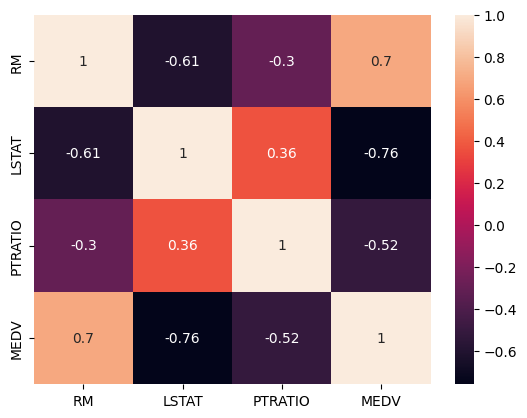

In [12]:
corr = df.corr()
sns.heatmap(corr,annot = True)

### BoxPlot Is A Part Of Visual EDA

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

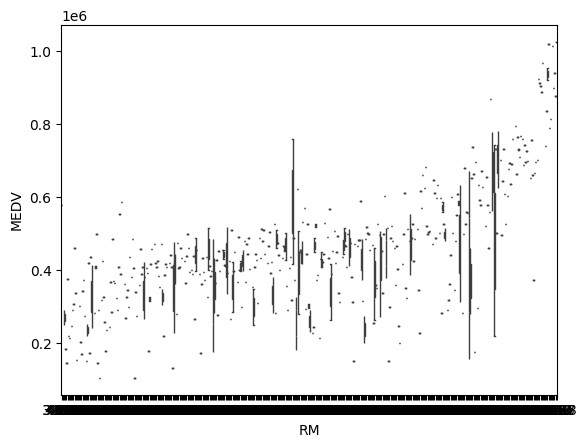

In [13]:
sns.boxplot(data=df[["RM", "MEDV"]], x = "RM", y = "MEDV")

<AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>

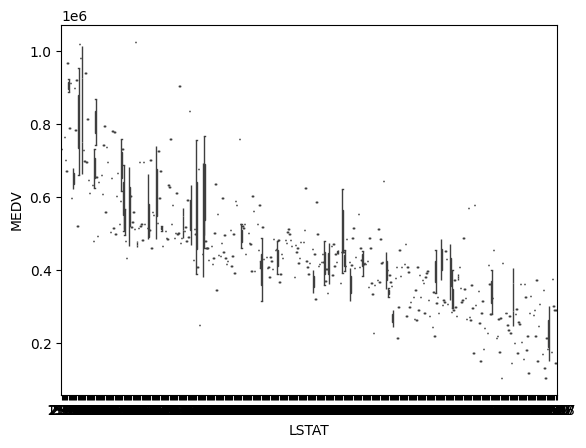

In [14]:
sns.boxplot(data=df[["LSTAT", "MEDV"]], x = "LSTAT", y = "MEDV")

<AxesSubplot: xlabel='PTRATIO', ylabel='MEDV'>

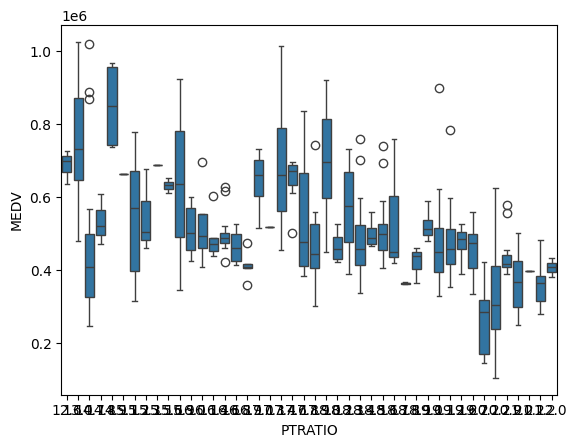

In [15]:
sns.boxplot(data=df[["PTRATIO","MEDV"]], x = "PTRATIO", y = "MEDV")

### Preprocessing Part 1 (Removing Outliers Using Z - Score)
    - Z = (X - Mean)/Std. Deviation
    - Z-score is a measure of how many standard deviations a data point is from the mean.


Here Outliers Are Deleted But One Can Also Impute Them

To calculate the Z-score, you need to subtract the mean of the dataset from each data point and divide the result by the standard deviation of the dataset.
Typically, a Z-score threshold of 3 or -3 is used to identify outliers. Any data point with a Z-score higher than the threshold is considered an outlier.

In [16]:
Z_Scores = np.abs((df - df.mean()) / df.std())

# Define a Z-score threshold of 3
threshold = 3

# Identify and remove the outliers in each column
df = df[(Z_Scores < threshold).all(axis=1)]
print(df)

        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
..     ...    ...      ...       ...
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

[472 rows x 4 columns]


### Preprocessing Part 2 (Removing Outliers Using InterQuartile Range)

    - Interquartile Range = Q3 - Q1
    - Minimum of Quartile = Q1 - (1.5 X Interquartile Range)
    - Maximum of Quartile = Q3 + (1.5 X Interquartile Range)

Data Points Not In Range Of Minimum of Quartile And Maximum of Quartile Are Outliers

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask based on the IQR values for each column
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Filter the DataFrame
df= df[~mask.any(axis=1)]

print(df)

        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
5    6.430   5.21     18.7  602700.0
..     ...    ...      ...       ...
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

[437 rows x 4 columns]


### EDA Analysis And Analysing Basic Information Of Data After Removal Of Outliers

EDA Analysis And Analysing Basic Information Will Be Again After Removal Of Outliers

In [18]:
BasicInfo(df)

Rows: 437
Columns:  ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object


We Can See Rows Have Decreased

In [19]:
EDA(df)

Column: RM
Mean: 6.191700228832953
Median: 6.164
Mode: 5.713
Skewness: 0.07851630499266217
Kurtosis: 0.06549657490882499
Minimum: 4.903
Maximum: 7.42
Range: 2.5170000000000003
Standard deviation: 0.46749695021812737
Column: LSTAT
Mean: 13.006887871853547
Median: 12.14
Mode: 6.36
Skewness: 0.6689787977342265
Kurtosis: -0.1399252133179809
Minimum: 1.98
Maximum: 30.81
Range: 28.83
Standard deviation: 6.325130083063405
Column: PTRATIO
Mean: 18.705720823798625
Median: 19.1
Mode: 20.2
Skewness: -0.6847842941266543
Kurtosis: -0.5892479959384738
Minimum: 14.7
Maximum: 22.0
Range: 7.300000000000001
Standard deviation: 1.9126544417706526
Column: MEDV
Mean: 430538.44393592677
Median: 430500.0
Mode: 525000.0
Skewness: 0.12053125063423252
Kurtosis: -0.054772614601702685
Minimum: 117600.0
Maximum: 743400.0
Range: 625800.0
Standard deviation: 125688.70361302058


### Again Getting Correlation As Mentioned Above, It Is A Part Of Visual EDA

<AxesSubplot: >

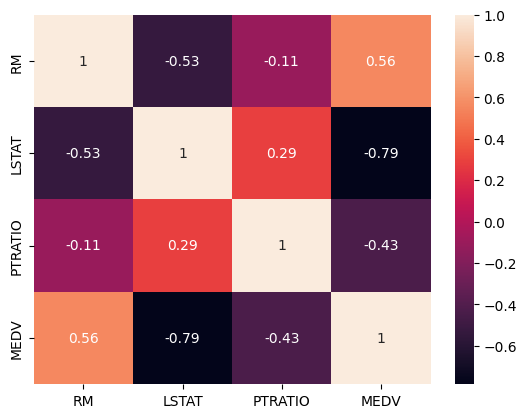

In [20]:
corr = df.corr()
sns.heatmap(corr,annot = True)

It Can Be Seen After Performing EDA Again That Skewness And Kurtosis Of Column: 'LSTAT' And 'PTRATIO' Are Very High, This Should Be Tackled By Using Transformation

- Log Transformation Is Used In Case Of Positive Skewness
- Box-Cox Transformation Is Preferable In Case Of Column With High Range And Negatively Skewed Data Thus:

**LSTAT Will Undergo Log Transformation And PTRATIO Will Undergo Box-Cox Transformation**


Text(0.5, 1.0, 'LSTAT column after Log Transform')

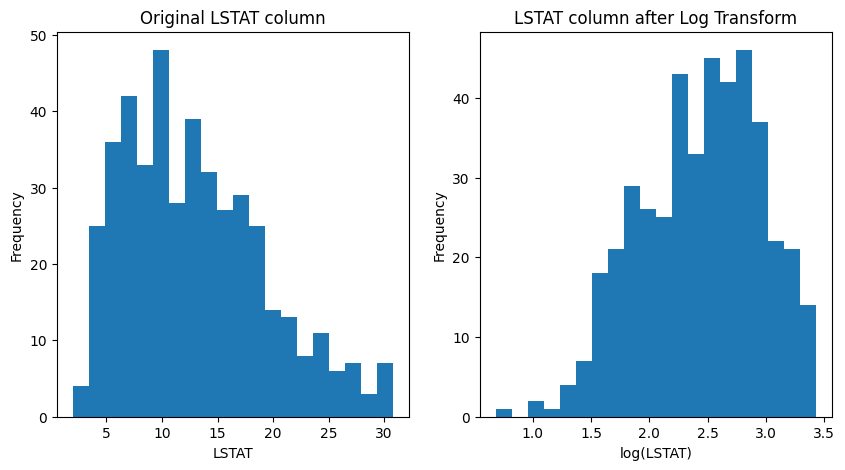

In [21]:
df['LSTAT_log'] = np.log(df['LSTAT'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(df['LSTAT'], bins=20)
ax1.set_xlabel('LSTAT')
ax1.set_ylabel('Frequency')
ax1.set_title('Original LSTAT column')
ax2.hist(df['LSTAT_log'], bins=20)
ax2.set_xlabel('log(LSTAT)')
ax2.set_ylabel('Frequency')
ax2.set_title('LSTAT column after Log Transform')

### PTRATIO Box-Cox Transformation And Graph Plotting

Text(0.5, 1.0, 'PTRATIO column after Box-Cox Transform')

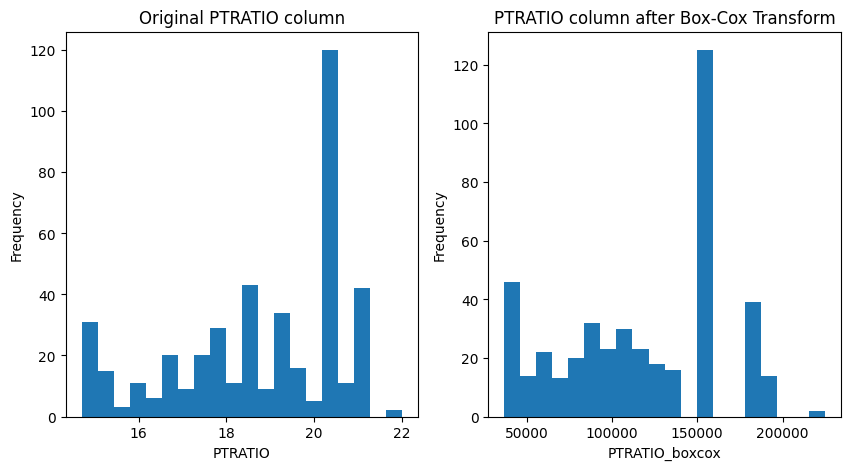

In [22]:
df['PTRATIO_boxcox'], _ = boxcox(df['PTRATIO']) #Underscore Used In LHS Discards Second Output That Is Lambda Value
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(df['PTRATIO'], bins=20)
ax1.set_xlabel('PTRATIO')
ax1.set_ylabel('Frequency')
ax1.set_title('Original PTRATIO column')
ax2.hist(df['PTRATIO_boxcox'], bins=20)
ax2.set_xlabel('PTRATIO_boxcox')
ax2.set_ylabel('Frequency')
ax2.set_title('PTRATIO column after Box-Cox Transform')

### Again Performing EDA And Analysing Basic Information To Check That If The Data Is Apt Or Not

In [23]:
BasicInfo(df)

Rows: 437
Columns:  ['RM', 'LSTAT', 'PTRATIO', 'MEDV', 'LSTAT_log', 'PTRATIO_boxcox']
RM                float64
LSTAT             float64
PTRATIO           float64
MEDV              float64
LSTAT_log         float64
PTRATIO_boxcox    float64
dtype: object


In [24]:
EDA(df)

Column: RM
Mean: 6.191700228832953
Median: 6.164
Mode: 5.713
Skewness: 0.07851630499266217
Kurtosis: 0.06549657490882499
Minimum: 4.903
Maximum: 7.42
Range: 2.5170000000000003
Standard deviation: 0.46749695021812737
Column: LSTAT
Mean: 13.006887871853547
Median: 12.14
Mode: 6.36
Skewness: 0.6689787977342265
Kurtosis: -0.1399252133179809
Minimum: 1.98
Maximum: 30.81
Range: 28.83
Standard deviation: 6.325130083063405
Column: PTRATIO
Mean: 18.705720823798625
Median: 19.1
Mode: 20.2
Skewness: -0.6847842941266543
Kurtosis: -0.5892479959384738
Minimum: 14.7
Maximum: 22.0
Range: 7.300000000000001
Standard deviation: 1.9126544417706526
Column: MEDV
Mean: 430538.44393592677
Median: 430500.0
Mode: 525000.0
Skewness: 0.12053125063423252
Kurtosis: -0.054772614601702685
Minimum: 117600.0
Maximum: 743400.0
Range: 625800.0
Standard deviation: 125688.70361302058
Column: LSTAT_log
Mean: 2.439914391214087
Median: 2.4965057856313524
Mode: 1.8500283773520307
Skewness: -0.3324400062204822
Kurtosis: -0.4584

<AxesSubplot: >

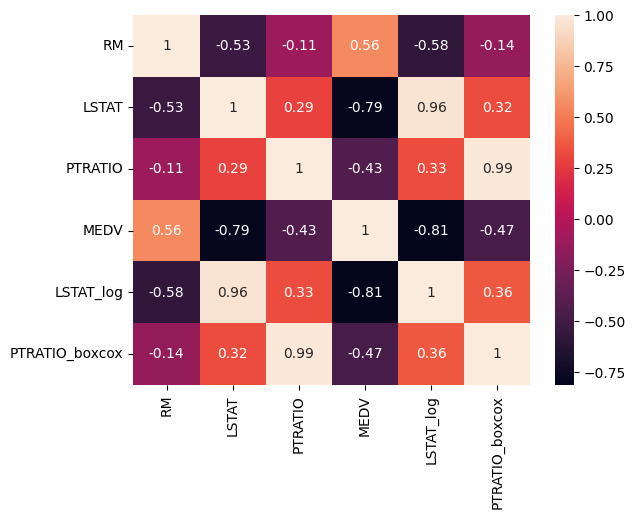

In [25]:
corr = df.corr()
sns.heatmap(corr,annot = True)

### Train Test Split

In [27]:
X = df[["RM", "LSTAT_log", "PTRATIO_boxcox"]]
Y = df[["MEDV"]]

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3)

### Neural Network

In [35]:
model = Sequential([
    # Input layer with a ReLU activation function
    Dense(128, input_shape=(X.shape[1],), activation='relu'),

    # Hidden layers with different activation functions
    Dense(64, activation='tanh'),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='elu'),
    Dense(8, activation='selu'),

    
    # Output layer for regression (no activation function)
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               512       
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521

In [36]:
# Fitting Model
model.fit(xtrain, ytrain, epochs=100, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/100
10/10 [==============================] - 1s 16ms/step - loss: 203795595264.0000 - val_loss: 194951659520.0000
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 203794087936.0000 - val_loss: 194950447104.0000
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 203792875520.0000 - val_loss: 194949251072.0000
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 203791581184.0000 - val_loss: 194947842048.0000
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 203790057472.0000 - val_loss: 194946285568.0000
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 203788402688.0000 - val_loss: 194944614400.0000
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 203786616832.0000 - val_loss: 194942763008.0000
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 203784683520.0000 - val_loss: 194940829696.0000
Epoch 9/100
10/10 [============

### Metrics

In [38]:
ypred = model.predict(xtest)

n = xtest.shape[0]  # Number of observations in the test set
k = xtest.shape[1]  # Number of predictor variables





# Calculating R-squared (R²)
r2 = r2_score(ytest, ypred)

# Calculating Adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print("R²:", r2)

print("Adjusted R²:", adjusted_r2)

5/5 [==============================] - 0s 1ms/step
R²: -11.09111721152215
Adjusted R²: -11.3745027711672
